# AN ANALYTICAL DETECTIVE

Crime is an international concern, but it is documented and handled in very different ways in different countries. In the United States, violent crimes and property crimes are recorded by the Federal Bureau of Investigation (FBI). Additionally, each city documents crime, and some cities release data regarding crime rates. The city of Chicago, Illinois releases crime data from 2001 onward online.

In [1]:
import pandas as pd

##  LOADING THE DATA 

In [2]:
datafile = "../data/mvtWeek1.csv"
mvt = pd.read_csv(datafile,dtype='unicode')
df = pd.DataFrame(mvt)

### Analysis

In [3]:
print(df.columns)
print(df.head())
print(df.describe())

Index(['ID', 'Date', 'LocationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'CommunityArea', 'Year', 'Latitude', 'Longitude'],
      dtype='object')
        ID            Date            LocationDescription Arrest Domestic  \
0  8951354  12/31/12 23:15                         STREET  FALSE    FALSE   
1  8951141  12/31/12 22:00                         STREET  FALSE    FALSE   
2  8952745  12/31/12 22:00  RESIDENTIAL YARD (FRONT/BACK)  FALSE    FALSE   
3  8952223  12/31/12 22:00                         STREET  FALSE    FALSE   
4  8951608  12/31/12 21:30                         STREET  FALSE    FALSE   

   Beat District CommunityArea  Year     Latitude     Longitude  
0   623        6            69  2012  41.75628399  -87.62164472  
1  1213       12            24  2012  41.89878849  -87.66130317  
2  1622       16            11  2012  41.96918578  -87.76766974  
3   724        7            67  2012  41.76932868  -87.65772562  
4   211        2            35  2012  41.

How many rows of data (observations) are in this dataset? 
n = 191641

In [4]:
print("\nHow many rows of data (observations) are in this dataset?:\n",len(df))
print("\nShape:",df.shape)


How many rows of data (observations) are in this dataset?:
 191641

Shape: (191641, 11)


How many variables are in this dataset?
c = 11 

what is the maximum value of the variable "ID"?

In [5]:
print("\nmaximum value of the variable ID is: ",df.ID.max())


maximum value of the variable ID is:  9181151


What is the minimum value of the variable "Beat"?

In [6]:
print("\nminimum value of the variable Beat:",df.Beat.min())


minimum value of the variable Beat: 1011


How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

In [7]:
df['Arrest'].value_counts()

FALSE    176105
TRUE      15536
Name: Arrest, dtype: int64

How many observations have a LocationDescription value of ALLEY? 2308

In [8]:
df['LocationDescription'].value_counts()

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

## UNDERSTANDING DATES

In many datasets, like this one, you have a date field. Unfortunately, R does not automatically recognize entries that look like dates. We need to use a function in R to extract the date and time. Take a look at the first entry of Date (remember to use square brackets when looking at a certain entry of a variable).

In what format are the entries in the variable Date? Month/Day/Year Hour:Minute 

In [9]:
df.Date.head()

0    12/31/12 23:15
1    12/31/12 22:00
2    12/31/12 22:00
3    12/31/12 22:00
4    12/31/12 21:30
Name: Date, dtype: object

Now, let's convert these characters into a Date object in python

In [10]:
from datetime import datetime

In [11]:
df['NewDate']=pd.to_datetime(df['Date'], format="%m/%d/%y %H:%M")

In [12]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,NewDate
0,8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628399,-87.62164472,2012-12-31 23:15:00
1,8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89878849,-87.66130317,2012-12-31 22:00:00
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96918578,-87.76766974,2012-12-31 22:00:00
3,8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76932868,-87.65772562,2012-12-31 22:00:00
4,8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83756759,-87.62176133,2012-12-31 21:30:00


What is the month and year of the median date in our dataset? Enter your answer as "Month Year", without the quotes. (Ex: if the answer was 2008-03-28, you would give the answer "March 2008", without the quotes.)

In [13]:
import statistics as stat

In [14]:
print("\nMedian Date:",stat.median(df.NewDate).strftime("%B %Y"))


Median Date: May 2006


Now, let's extract the month and the day of the week, and add these variables to our data frame mvt. We can do this with two simple functions

In [30]:
df['day_of_week'] = df['NewDate'].dt.dayofweek
df.day_of_week.describe()

count    191641.000000
mean          2.996238
std           1.985848
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: day_of_week, dtype: float64

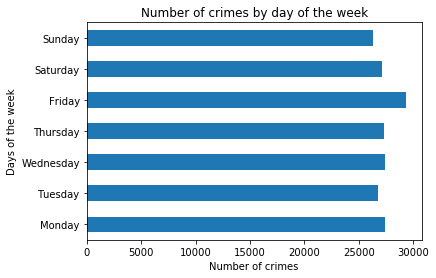

In [32]:
import matplotlib.pyplot as plt 
import numpy as np

days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.day_of_week]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [36]:
df['Month']=df['NewDate'].dt.month

In which month did the fewest motor vehicle thefts occur? 

2 means February

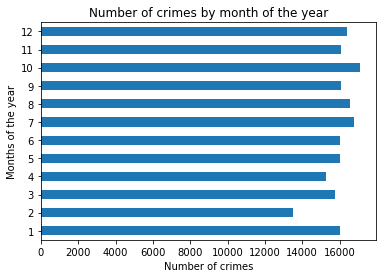

In [37]:
df.groupby([df.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

In [16]:
df.groupby('Month')['ID'].count()

Month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: ID, dtype: int64

Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was
later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

Januarry -> 1435

In [17]:
df.groupby(['Month','Arrest'])['ID'].count()

Month  Arrest
1      FALSE     14612
       TRUE       1435
2      FALSE     12273
       TRUE       1238
3      FALSE     14460
       TRUE       1298
4      FALSE     14028
       TRUE       1252
5      FALSE     14848
       TRUE       1187
6      FALSE     14772
       TRUE       1230
7      FALSE     15477
       TRUE       1324
8      FALSE     15243
       TRUE       1329
9      FALSE     14812
       TRUE       1248
10     FALSE     15744
       TRUE       1342
11     FALSE     14807
       TRUE       1256
12     FALSE     15029
       TRUE       1397
Name: ID, dtype: int64

## VISUALIZING CRIME TRENDS

Now, let's make some plots to help us better understand how crime has changed over time in Chicago. Throughout this
problem, and in general, you can save your plot to a file. For more information, this website very clearly explains the
process.
First, let's make a histogram of the variable Date. We'll add an extra argument, to specify the number of bars we want in
our histogram.

In [53]:
import matplotlib.pyplot as plt 
import numpy as np

In [41]:
by_year=df.groupby("Year").size()
by_year.head(n=12)

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
dtype: int64

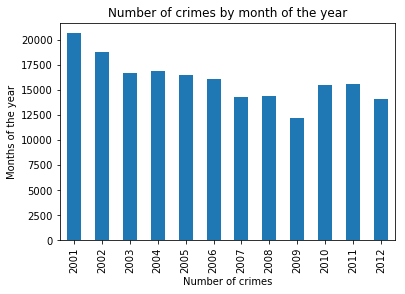

In [42]:
df.groupby("Year").size().plot(kind='bar')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

Looking at the histogram, answer the following questions.

In general, does it look like crime increases or decreases from 2002 - 2012?

Answer: In this time period, there is a clear downward trend in crime